In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from eval.learning_curve import LearningCurve
from eval.eval_utils import Phase

import eval.log_utils as lu
    
print("Done importing")

Done importing


## Plot learning curve

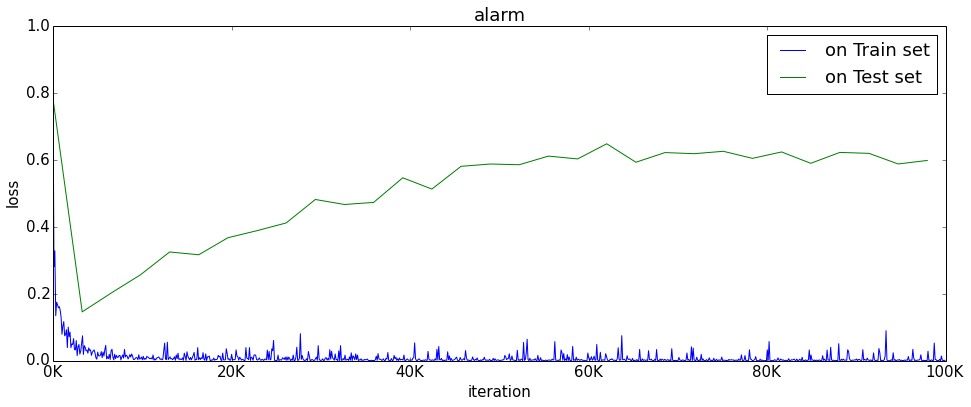

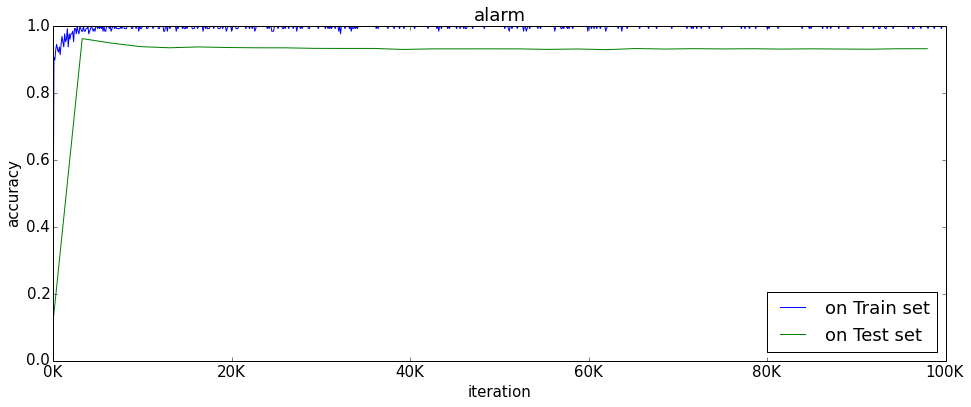

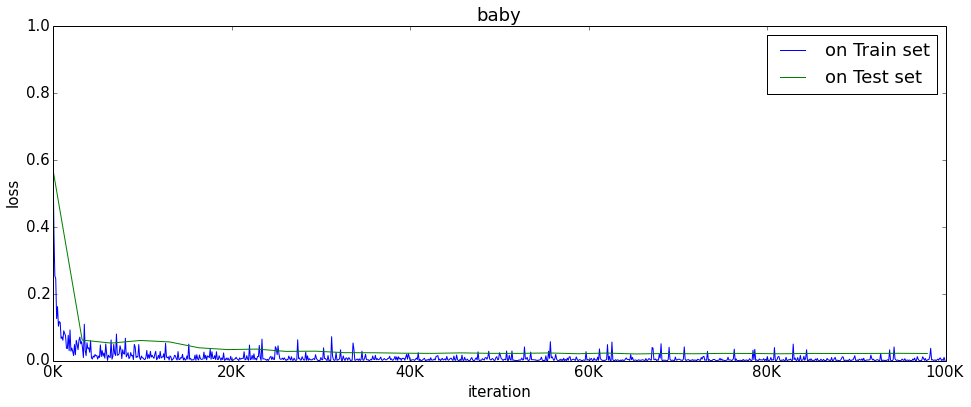

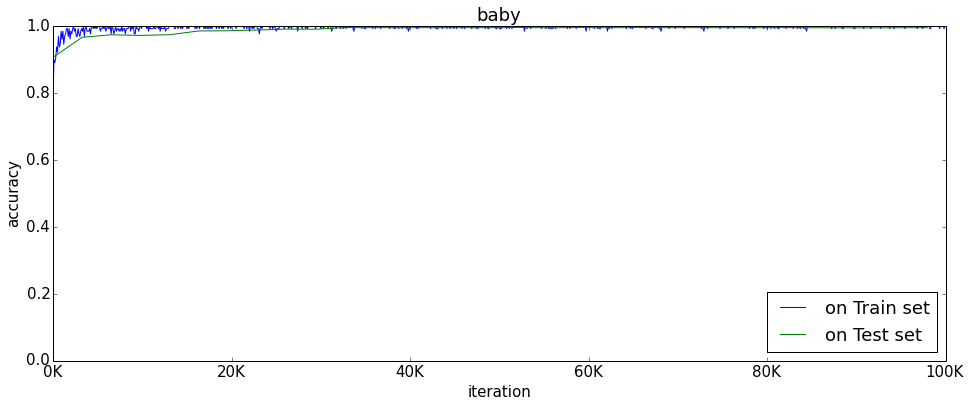

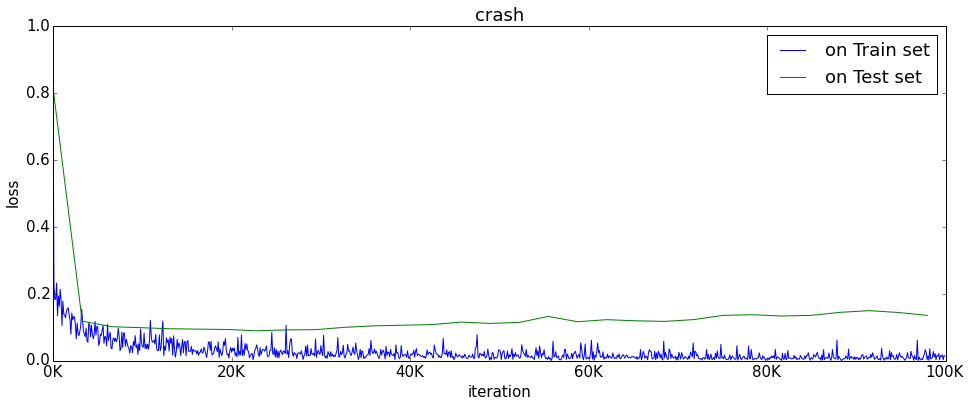

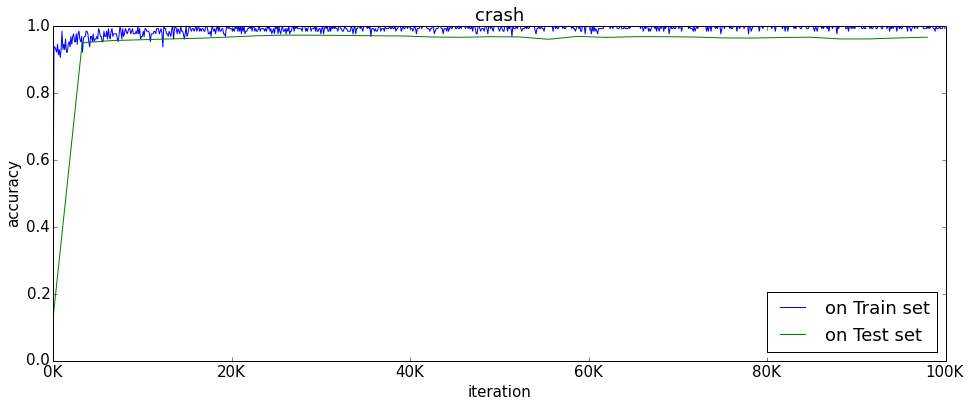

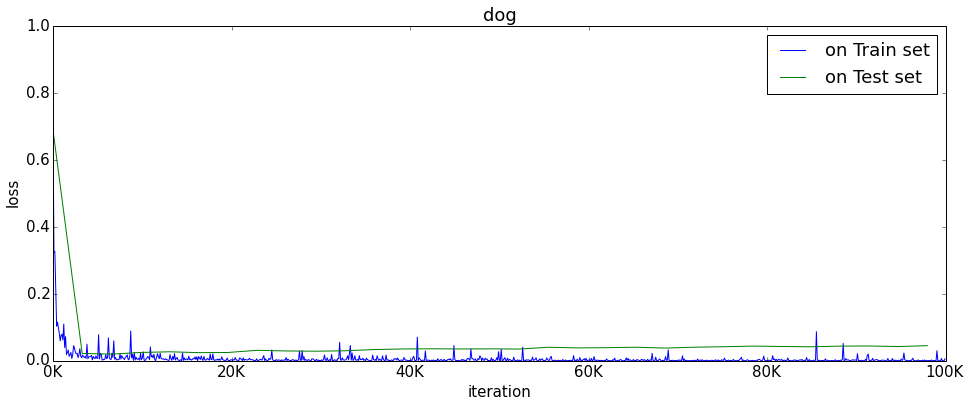

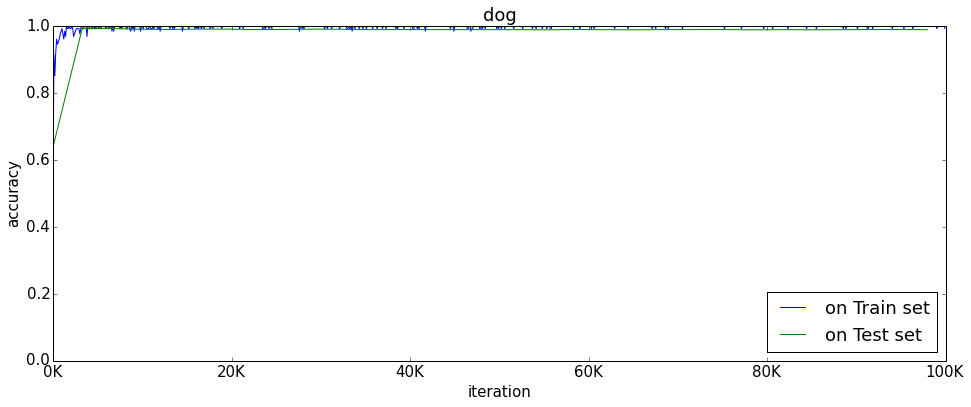

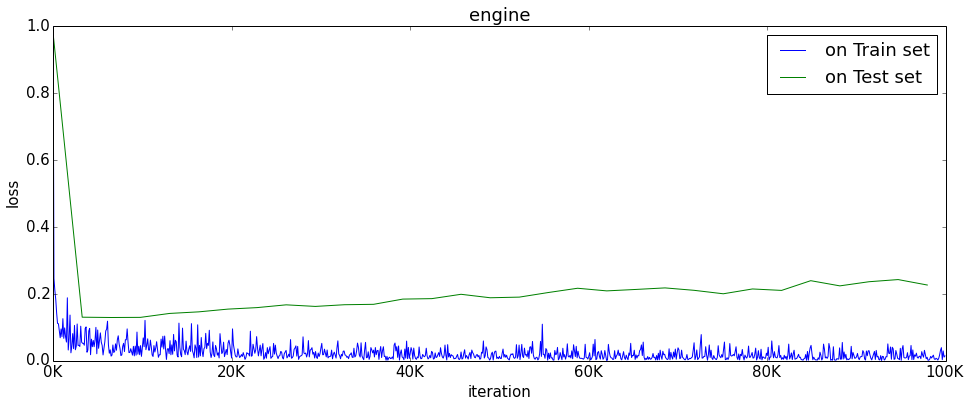

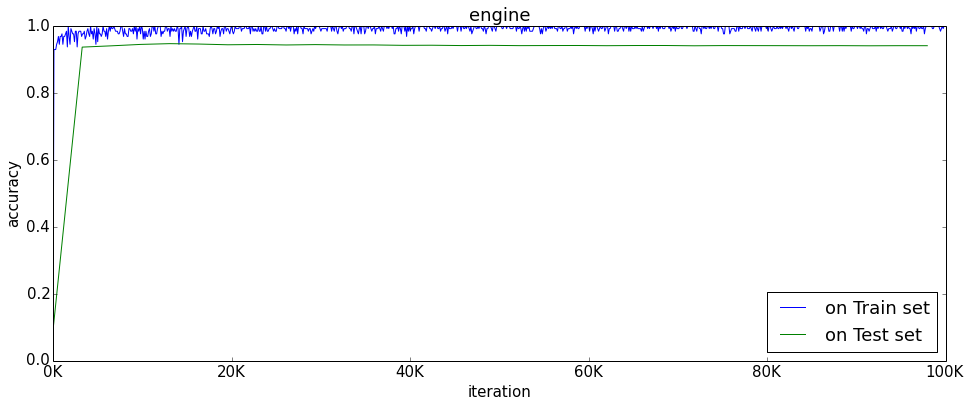

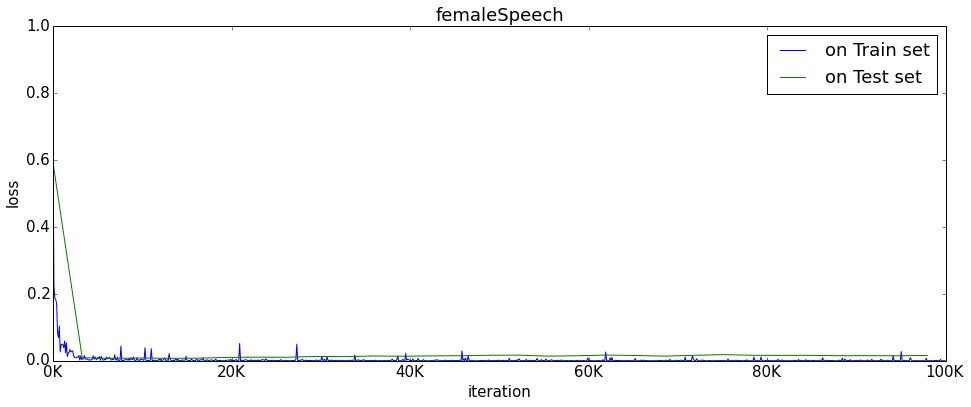

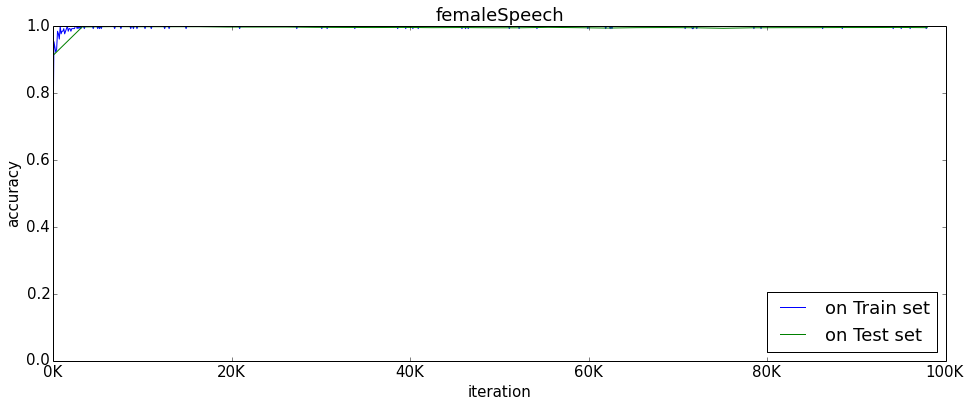

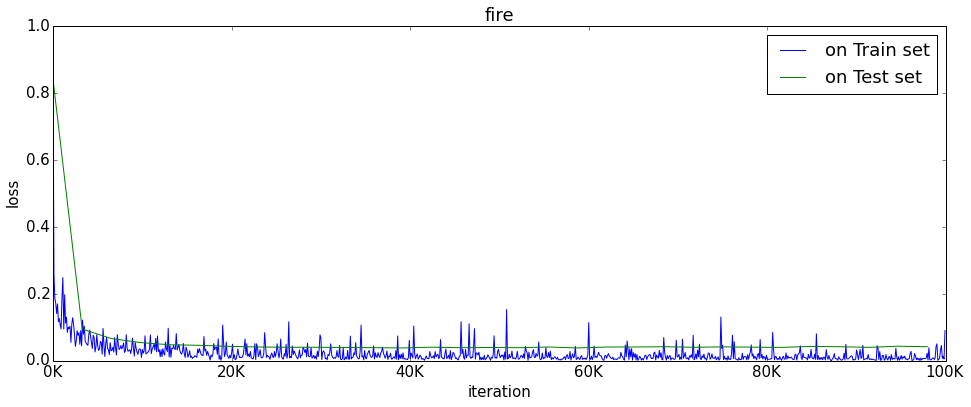

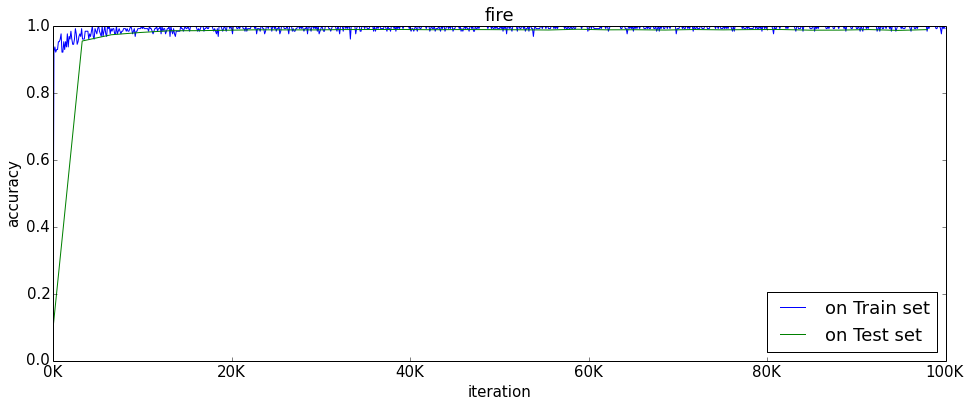

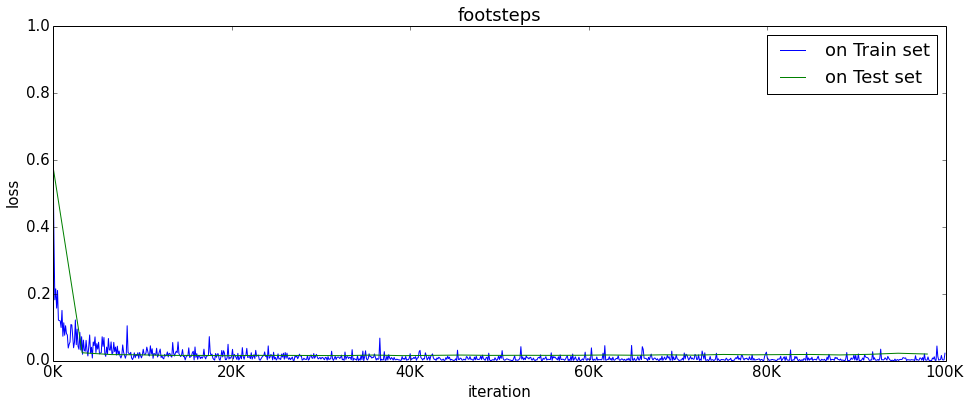

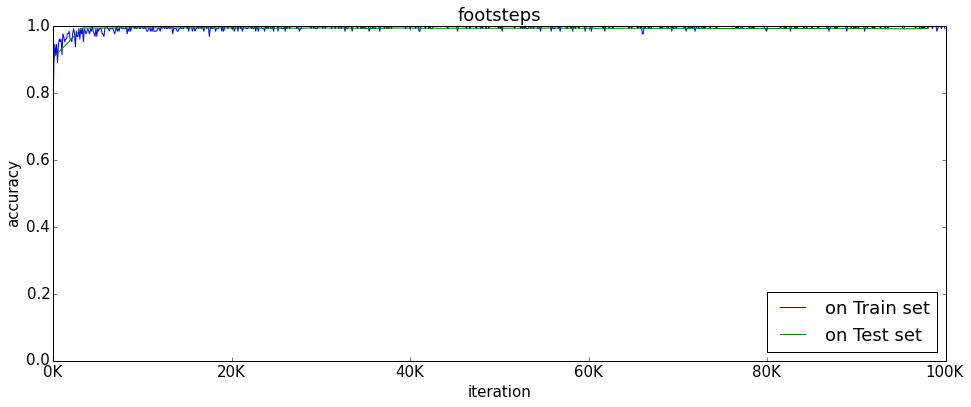

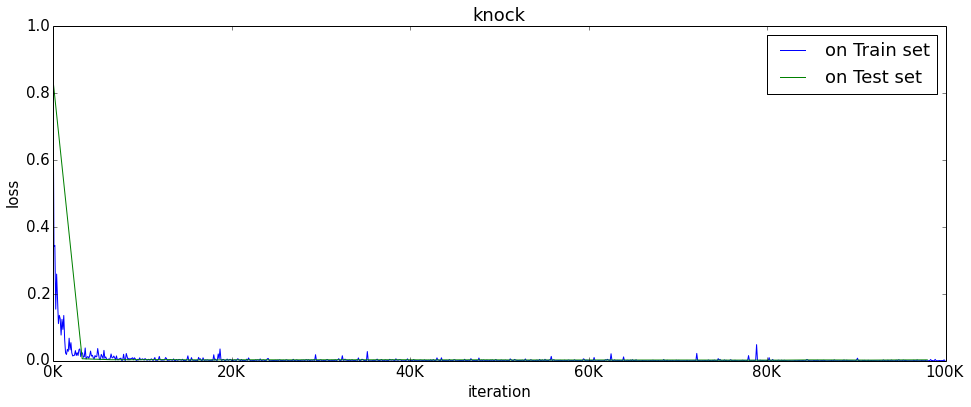

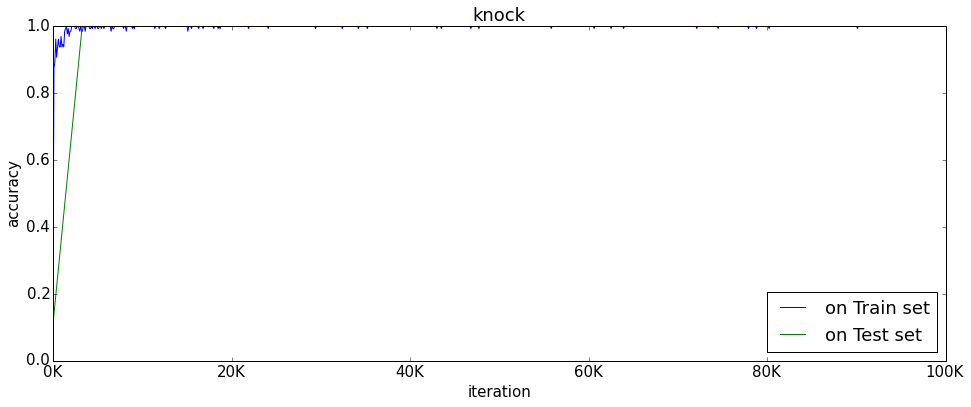

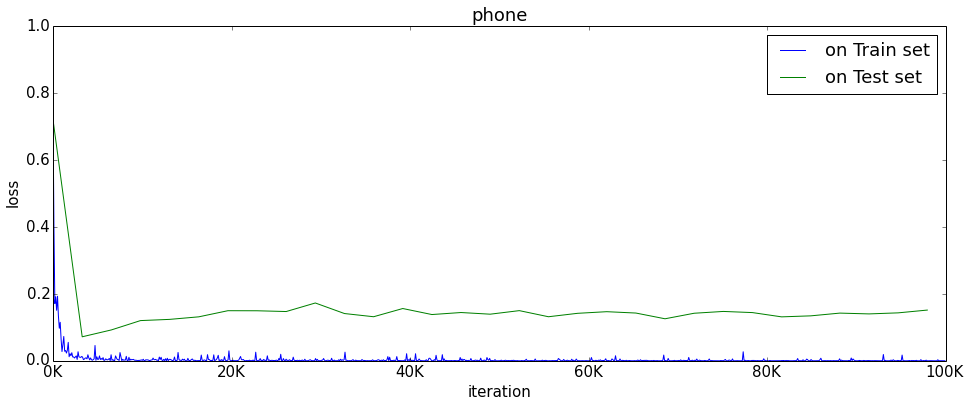

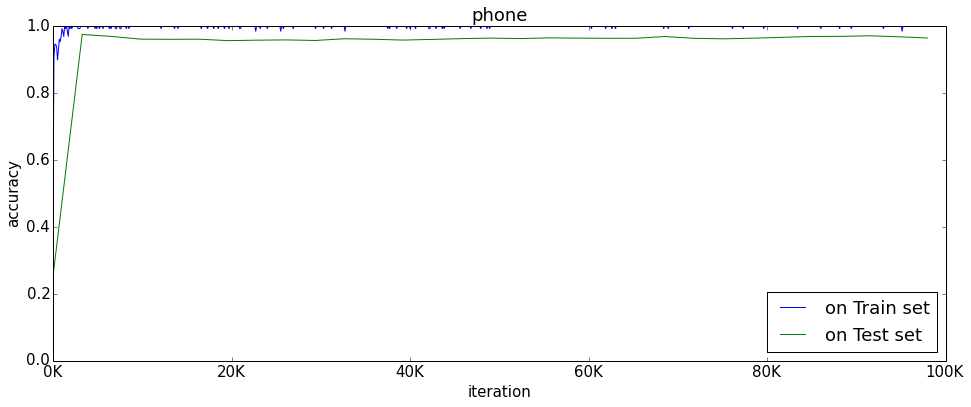

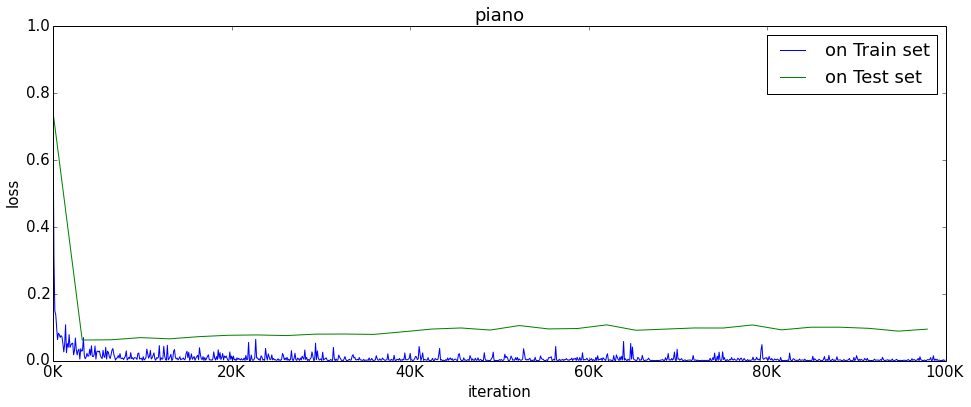

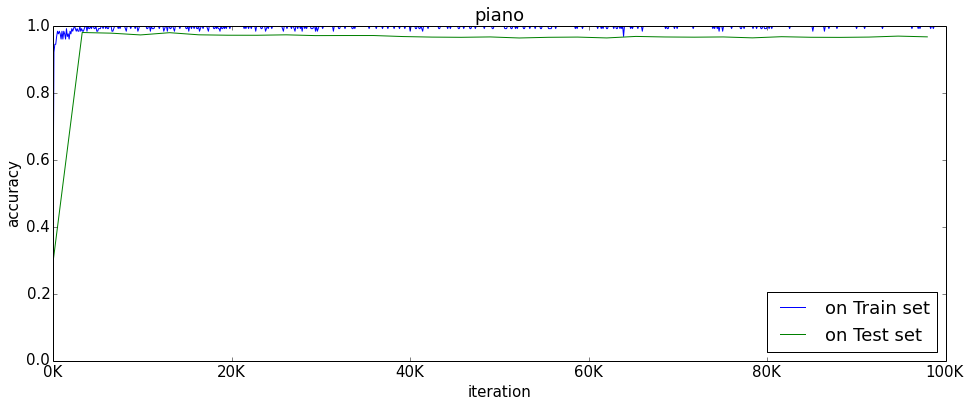

In [4]:
log_path = '/mnt/raid/dnn/jm/dnn_clean/models_grouptalk_1/caffe.INFO'

e = LearningCurve(log_path)
e.parse()

soundtypes=['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']

for s in range(len(soundtypes)):
    plt.figure()
    for phase in [Phase.TRAIN, Phase.TEST]:    
        num_iter = e.list('NumIters', phase)
        loss = e.list('loss'+str(s+1).zfill(2), phase)
        plt.plot(num_iter, loss, label='on %s set' % (phase,))
        plt.ylim((0,1))
        plt.xlabel('iteration')
        # format x-axis ticks
        ticks, _ = plt.xticks()
    
        plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
        plt.ylabel('loss')
        #plt.title(e.name())
        plt.title(soundtypes[s])
        plt.legend()
    plt.figure()
    for phase in [Phase.TRAIN, Phase.TEST]:    
        num_iter = e.list('NumIters', phase)
        loss = e.list('acc'+str(s+1).zfill(2), phase)
        plt.plot(num_iter, loss, label='on %s set' % (phase,))
        plt.ylim((0,1))
        plt.xlabel('iteration')
        # format x-axis ticks
        ticks, _ = plt.xticks()
    
        plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
        plt.ylabel('accuracy')
        #plt.title(e.name())
        plt.title(soundtypes[s])
        plt.legend(loc='lower right')
        plt.grid()  
